In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate_toy as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
sys.path.append('../')
sys.path.append('../../code_Boyle')
sys.path.append('../../code_general')
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID_toy as model
import read_model_ID as model2
reload(model)

<module 'read_model_ID_toy' from 'read_model_ID_toy.pyc'>

## Modulate forward or backward rate?

Text(0,0.5,'mean rate I -> cleaved')

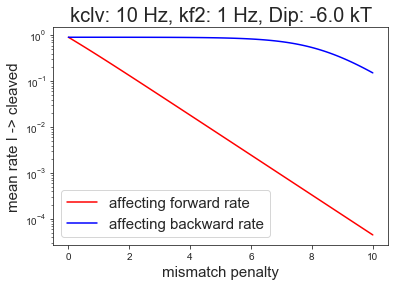

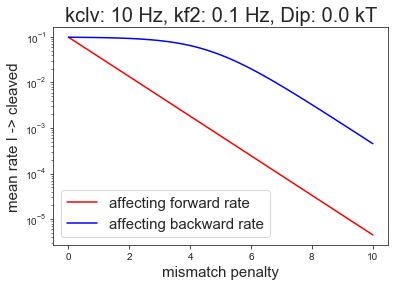

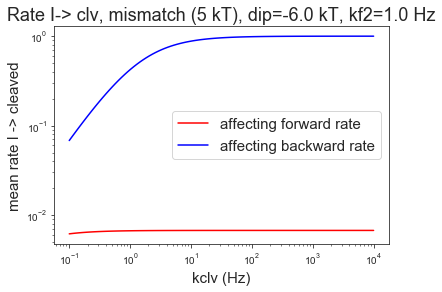

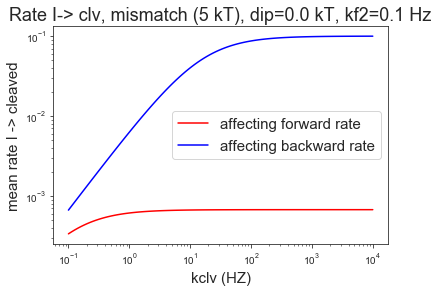

In [23]:
def rate(forward,backward,cleavage):
    return cleavage/(1+(backward+cleavage)/forward)

dip = -6.
cleavage = 10**1
forward = 1
backward = forward*np.exp(dip)

rate_f = []
rate_b = []

for i in np.linspace(0,10,100):
    rate_f.append(rate(forward*np.exp(-i),backward,cleavage))
    rate_b.append(rate(forward,backward*np.exp(i),cleavage))
    
plt.figure()
plt.semilogy(np.linspace(0,10,100),rate_f,'r')
plt.semilogy(np.linspace(0,10,100),rate_b,'b')
plt.title('kclv: ' + str(np.round(cleavage)) + ' Hz, kf2: '  + str(forward) + ' Hz, Dip: ' + str(dip) + ' kT',fontsize = 20)
plt.legend(['affecting forward rate','affecting backward rate'],fontsize = 15)
plt.xlabel('mismatch penalty',fontsize = 15)
plt.ylabel('mean rate I -> cleaved',fontsize = 15)


dip = 0.
cleavage = 10**1
forward = 0.1
backward = forward*np.exp(dip)

rate_f = []
rate_b = []

for i in np.linspace(0,10,100):
    rate_f.append(rate(forward*np.exp(-i),backward,cleavage))
    rate_b.append(rate(forward,backward*np.exp(i),cleavage))
    
plt.figure()
plt.semilogy(np.linspace(0,10,100),rate_f,'r')
plt.semilogy(np.linspace(0,10,100),rate_b,'b')
plt.title('kclv: ' + str(np.round(cleavage)) + ' Hz, kf2: '  + str(forward) + ' Hz, Dip: ' + str(dip) + ' kT',fontsize = 20)
plt.legend(['affecting forward rate','affecting backward rate'],fontsize = 15)
plt.xlabel('mismatch penalty',fontsize = 15)
plt.ylabel('mean rate I -> cleaved',fontsize = 15)

dip = -6.
forward = 1.
backward = forward*np.exp(dip)

rate_f = []
rate_b = []

for cleavage in np.logspace(-1,4,100):
    rate_f.append(rate(forward*np.exp(-5.),backward,cleavage))
    rate_b.append(rate(forward,backward*np.exp(5.),cleavage))
    
    
plt.figure()
plt.loglog(np.logspace(-1,4,100),rate_f,'r')
plt.loglog(np.logspace(-1,4,100),rate_b,'b')
plt.title('Rate I-> clv, mismatch (5 kT), dip=' + str(dip) + ' kT, kf2=' + str(forward) + ' Hz',fontsize = 18)
plt.legend(['affecting forward rate','affecting backward rate'],fontsize = 15)
plt.xlabel('kclv (Hz)',fontsize = 15)
plt.ylabel('mean rate I -> cleaved',fontsize = 15)

dip = 0.
forward = .1
backward = forward*np.exp(dip)

rate_f = []
rate_b = []

for cleavage in np.logspace(-1,4,100):
    rate_f.append(rate(forward*np.exp(-5.),backward,cleavage))
    rate_b.append(rate(forward,backward*np.exp(5.),cleavage))
    
plt.figure()
plt.loglog(np.logspace(-1,4,100),rate_f,'r')
plt.loglog(np.logspace(-1,4,100),rate_b,'b')
plt.title('Rate I-> clv, mismatch (5 kT), dip=' + str(dip) + ' kT, kf2=' + str(forward) + ' Hz',fontsize = 18)
plt.legend(['affecting forward rate','affecting backward rate'],fontsize = 15)
plt.xlabel('kclv (HZ)',fontsize = 15)
plt.ylabel('mean rate I -> cleaved',fontsize = 15)

[1.5641814477899998 2.242905038 6.69459452401 5.988477709800001
 4.48300119978 5.63868077989 6.19683729119 5.1055995567900005
 6.146514016059999 5.8447344994 6.729104143 7.49842519473 5.69978855765
 5.5200466305499996 4.5060459989699995 5.2522936167 5.10086442885
 4.53537972618 3.73514366794 2.50084758613 2.5175495267400003
 3.06547635566 2.50297376258 -2.39851897054 -0.729266456785
 -0.09948923081260001 1.9925159125999998]
[1.5641814477899998 2.242905038 0.0 5.37 5.37 5.37 5.37 5.37 5.37 5.37
 5.37 5.37 5.37 5.37 5.37 5.37 5.37 5.37 5.37 5.37 5.37 5.37 5.37
 -2.39851897054 -0.729266456785 -0.1 1.0]
7067.7295837167885


Text(453.236,0.5,'mismatch 2')

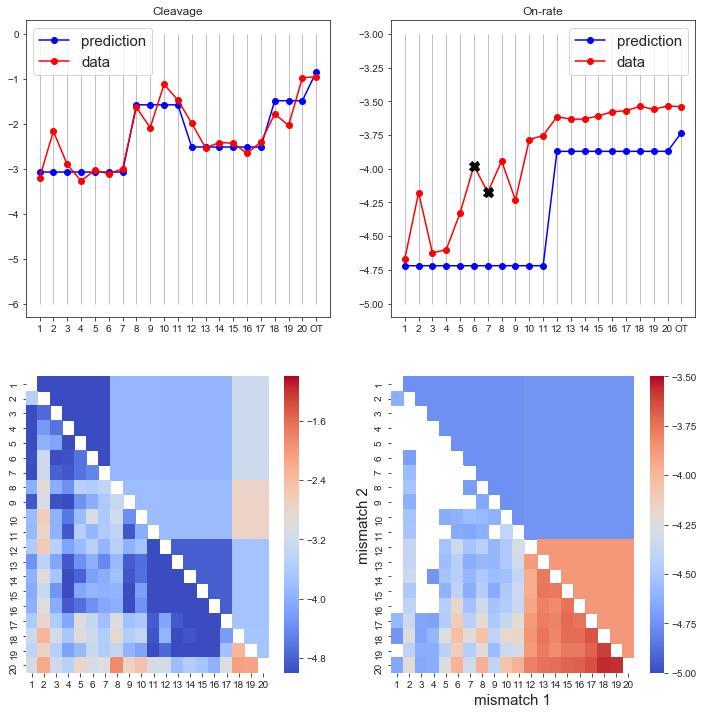

In [23]:
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'


filename = 'fit_7_6_2019_sim_8_5.txt'
path = '../../fits_Stijn/7_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

print parameters

parameters[3:23] = 5.37
parameters[2] = 0.
parameters[-2] = -0.1
parameters[-1] = 1.

print parameters


model_id = 'engineered_clv_rates_constant_ei+engineered_on_rates_constant_ei'
parameters = [0.,-0.1,1.]

filename = 'Enh_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    #if len(xdata[i])==1:
    #    if xdata[i][0]==6 or xdata[i][0]==7:
    #        ydata[i][1] = []
    #        yerr[i][1] = []
    if len(xdata[i]) > 0 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]


chi2 = 0.

for i in range(len(xdata)):
    chi2 += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)
    
print chi2

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

kclv = []
kon = []
erron = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append((ydata[a][1][0]))
            erron.append((yerr[a][1][0]))
            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append((ydata[0][1][0]))
kon = np.array(kon)
erron.append(yerr[0][1][0])
erron = np.array(erron)


k_double = np.zeros([20,20])
on_double = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0][0])
        if len(ydata[a][1])>0:
            on_double[j-1,i-1] = (ydata[a][1][0])
        else:
            on_double[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
on_double_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))

reload(clv)
k = np.zeros(21)
on = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],on[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],on[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))

f,ax = plt.subplots(2,2,sharey=False,figsize=[12,12])
    
ax[0][0].plot(range(1,22),k,marker='o',color='blue')
ax[0][0].set_xticks(range(1,22));
ax[0][0].set_xticklabels(range(1,21)+['OT'])
ax[0][0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0][0].plot(range(1,22),kclv,marker='o',color='red')
ax[0][0].legend(['prediction','data'],fontsize=15)
ax[0][0].set_title('Cleavage')

ax[0][1].plot(range(1,22),on,marker='o',color='blue')
#ax[0][1].errorbar(range(1,22),kon,erron*10,marker='o',color='red')
ax[0][1].set_xticks(range(1,22));
ax[0][1].set_xticklabels(range(1,21)+['OT'])
ax[0][1].vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
ax[0][1].plot(range(1,22),kon,marker='o',color='red')
ax[0][1].legend(['prediction','data'],fontsize=15)
ax[0][1].set_title('On-rate')
for i in range(21):
    if i+1==6 or i+1==7:
        ax[0][1].plot(i+1,kon[i],marker='X',color='k',markersize=10)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],on_double[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
on_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))
on_df = on_df + on_double_df
for i in range(1,21):
    on_df[i].loc[i]=np.nan
    
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1][0],vmin=-5,vmax=-1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df, cmap='coolwarm', cbar=True,ax=ax[1][1],vmin=-5,vmax=-3.5)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

## Chi for different values of kclv

[-1, 6, 1000, 2000]

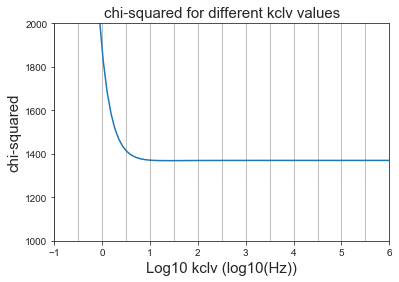

In [16]:
model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'


filename = 'fit_28_6_2019_sim_6.txt'
path = '../../fits_Stijn/28_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)


filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    #if len(xdata[i])==1:
    #    if xdata[i][0]==6 or xdata[i][0]==7:
    #        ydata[i][1] = []
    #        yerr[i][1] = []
    if len(xdata[i]) > 0 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

chi_sqr = []

for kclv in np.linspace(-2.,6.,100):
    parameters[-1] = kclv
    chi2 = 0.

    for i in range(len(xdata)):
        chi2 += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)
        
    chi_sqr.append(chi2)
    
plt.plot(np.linspace(-2.,6.,100),chi_sqr)
plt.title('chi-squared for different kclv values',fontsize=15)
plt.xlabel('Log10 kclv (log10(Hz))',fontsize=15)
plt.ylabel('chi-squared',fontsize=15)
plt.vlines(np.arange(-1,7,0.5),1000,2000,linewidth=0.5,color='grey')
plt.axis([-1,6,1000,2000])

## Chi for different values of R

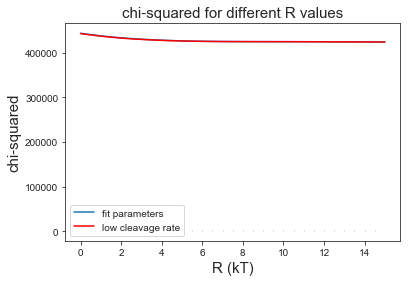

In [8]:
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'


filename = 'fit_28_6_2019_sim_18.txt'
path = '../../fits_Stijn/28_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)


filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    #if len(xdata[i])==1:
    #    if xdata[i][0]==6 or xdata[i][0]==7:
    #        ydata[i][1] = []
    #        yerr[i][1] = []
    if len(xdata[i]) > 0 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

chi_sqr = []

for R in np.linspace(0.,15.,100):
    parameters[2] = R
    chi2 = 0.

    for i in range(len(xdata)):
        chi2 += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)
        
    chi_sqr.append(chi2)
    
plt.plot(np.linspace(0.,15.,100),chi_sqr)
plt.title('chi-squared for different R values',fontsize=15)
plt.xlabel('R (kT)',fontsize=15)
plt.ylabel('chi-squared',fontsize=15)
plt.vlines(np.arange(0.,15.,0.5),1000,2000,linewidth=0.5,color='grey')
#plt.axis([6,15,1000,2000])

parameters[-1] = 0.5

chi_sqr2 = []

for R in np.linspace(0.,15.,100):
    parameters[2] = R
    chi2 = 0.

    for i in range(len(xdata)):
        chi2 += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)
        
    chi_sqr2.append(chi2)
    
plt.plot(np.linspace(0.,15.,100),chi_sqr2,'r')
plt.legend(['fit parameters','low cleavage rate'])

## Finding good value for constant epsilon i

[0, 1.5, 1400, 2400]

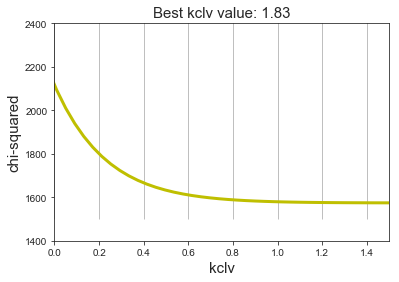

In [50]:
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'

filename = 'fit_7_6_2019_sim_8_5.txt'
path = '../../fits_Stijn/7_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    #if len(xdata[i])==1:
    #    if xdata[i][0]==6 or xdata[i][0]==7:
    #        ydata[i][1] = []
    #        yerr[i][1] = []
    if len(xdata[i]) > 0 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]
parameters[3:23] = 5.37

#chis = []
#for i in np.linspace(-1.,3.,100):
#    parameters[-1] = i
#    chi = 0.
#    
#    for i in range(len(xdata)):
#        chi += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)
#        
#    chis.append(chi)
    
#parameters[-1] = 1.   
#chis2 = []
#for i in np.linspace(4.5,6.5,100):
#    parameters[3:23] = i
#    chi = 0.
#    
#    for i in range(len(xdata)):
#        chi += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)
#        
#    chis2.append(chi)
    

plt.plot(np.linspace(-1.,3.,100),chis,'y',linewidth=3.)
#plt.plot(np.linspace(4.5,6.5,100),chis2,'r:',linewidth=2.)
plt.plot(np.linspace(-1.,3.,100)[np.argmin(chis)],chis[np.argmin(chis)],'yX',markersize=10)
#plt.plot(np.linspace(4.5,6.5,100)[np.argmin(chis2)],chis[np.argmin(chis)],'rX',markersize=10)
#plt.legend(['high kclv','low kclv'],fontsize=15)
plt.vlines(np.linspace(-1.,3.,21),1500,3000,linewidth=0.5,color='grey')
plt.xlabel('kclv',fontsize=15)
plt.ylabel('chi-squared',fontsize=15)
plt.title('Best kclv value: '+str(np.round(np.linspace(-1.,3.,100)[np.argmin(chis)],2)),fontsize=15)
plt.axis([0,1.5,1400,2400])

## Chi recalculator

In [51]:
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'
#model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'


filename = 'fit_27_6_2019_sim_5.txt'
path = '../../fits_Stijn/27_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)


filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    #if len(xdata[i])==1:
    #    if xdata[i][0]==6 or xdata[i][0]==7:
    #        ydata[i][1] = []
    #        yerr[i][1] = []
    if len(xdata[i]) > 0 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]
chi2 = 0.

for i in range(len(xdata)):
    chi2 += clv.calc_chi_squared(parameters,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id,True)

print chi2

1329.9756607295622


## How to calculate chi-squared to get what I want?

In [54]:
model_id2 = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'


filename = 'fit_28_6_2019_sim_6.txt'
path = '../../fits_Stijn/28_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters2 = np.array(final_par.values)

model_id1 = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'


filename = 'fit_27_6_2019_sim_5.txt'
path = '../../fits_Stijn/27_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters1 = np.array(final_par.values)


filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):

    if len(xdata[i]) == 2  and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7 or xdata[i][1] == 2 or xdata[i][1] ==6 or xdata[i][1] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i]) == 1 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

chi1 = 0.
chi2 = 0.

for i in range(len(xdata)):
    if len(xdata[i])==0:
        chi1 += clv.calc_chi_squared(parameters1,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id1,True)
        chi2 += clv.calc_chi_squared(parameters2,xdata[i],ydata[i],yerr[i],chi_weights,True,model_id2,True)
        
print 'not fixed PAM: ' + str(np.round(chi1))
print 'fixed PAM: ' + str(np.round(chi2))

not fixed PAM: 3.0
fixed PAM: 0.0


## Load Data

In [2]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_nucleaseq_log(filename,path_to_data,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_nucleaseq_log(filename,path_to_data,False)

kclv = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0])
            i = i + 1
    
kclv.append(ydata[0][0])
kclv = np.array(kclv)


k_double = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0])
        if k_double[j-1,i-1] < -5.:
            k_double[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))

## Prepare Model

In [ ]:
model_id = 'four_state_model_clv_engineered_cas2'; parnum = '2'

filename = 'fit_17_6_2019_sim_4.txt'
path = '../../fits_Stijn/17_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

print parameters
parameters = [5.,-.1]

## Plots

In [ ]:
reload(model)
reload(clv)
k = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,mismatch_positions))
k[-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,[]))

f,ax = plt.subplots(3,1,sharey=False,figsize=[7,16])
    
ax[0].plot(range(1,22),k,marker='o',color='blue')
ax[0].set_xticks(range(1,22));
ax[0].set_xticklabels(range(1,21)+['OT'])
ax[0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0].plot(range(1,22),kclv,marker='o',color='red')
ax[0].legend(['prediction','data'],fontsize=15)
ax[0].set_title('Cleavage')

k_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1] = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
        
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1],vmin=-5,vmax=-1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)


datacleave = []
fitcleave = []

for i in range(len(xdata)):
    cleavagetemp = np.log10(clv.calc_cleavage_rate_fast(parameters,model_id,xdata[i]))
    for j in range(len(ydatafull[i])):
        if (ydatafull[i][j])>(-10):
            datacleave.append(ydatafull[i][j])
            fitcleave.append(cleavagetemp)
        
        
ax[2].plot(fitcleave,datacleave,marker='x',markersize=3,color='lime',linewidth=0.0)
ax[2].plot([-8,1],[-8,1],'k-.',linewidth=3)
#ax[2].set_axis([-8,1,-8,1])
ax[2].set_title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([datacleave,fitcleave])[0][1],4)), fontsize=15)
ax[2].set_xlabel('Predicted cleavage rate (Hz)',fontsize=15)
ax[2].set_ylabel('Measured cleavage rate (Hz)',fontsize=15)

In [ ]:
epsilon,_ = model.unpack_parameters(parameters,model_id)
plt.figure()
plt.plot(range(1,21),epsilon[5:25],'ro')
plt.xlabel('position',fontsize=15)
plt.ylabel('EpsilonI (kBT)',fontsize=15)
plt.title('Mismatch energies',fontsize=15)
plt.vlines(range(1,21),0,10,color='grey',linewidth=0.5);
plt.xticks(range(1,21),range(1,21),fontsize=15,rotation='vertical');

6.812836570014558
6.063052713847719


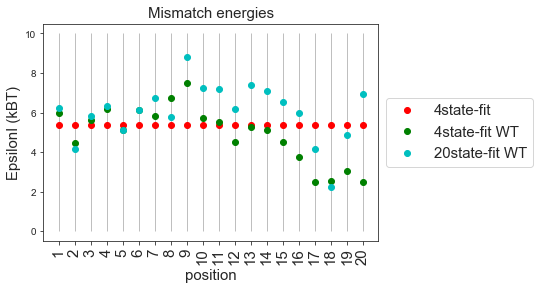

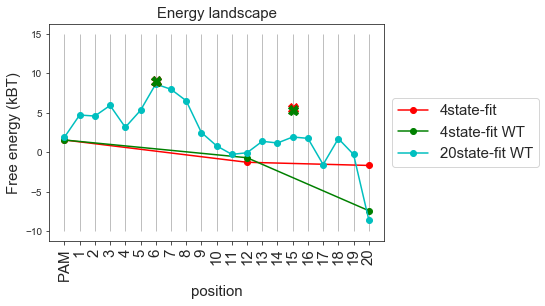

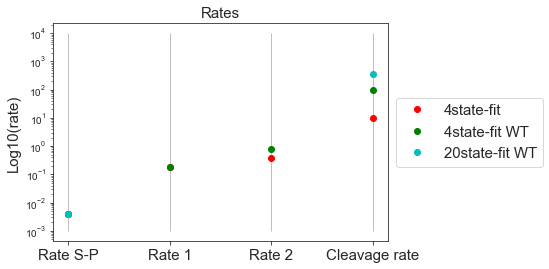

In [56]:
file = '../../fits_Stijn/8_7_2019/fit_8_7_2019_sim_21.txt'
#model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'
#model_id = 'engineered_clv_rates_constant_ei+engineered_on_rates_constant_ei'; parnum= '3'
model_id = 'engineered_clv_rates_constant_ei_v2+engineered_on_rates_constant_ei_v2'; parnum= '4'
data = pd.read_table(file,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
final_par_np = np.array(final_par.values)
parameters = final_par_np


model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(final_par_np,model_id)
energies,rates = model.unpack_parameters(parameters_on,model_ID_on,20)
_,rates_clv = model.unpack_parameters(parameters_clv,model_ID_clv,20)
rates[-1] = rates_clv[-1]

file = '../../fits_Stijn/7_6_2019/fit_7_6_2019_sim_8_5.txt'
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'
data = pd.read_table(file,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
final_par_np = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(final_par_np,model_id)
energies2,rates2 = model.unpack_parameters(parameters_on,model_ID_on,20)
_,rates_clv = model.unpack_parameters(parameters_clv,model_ID_clv,20)
rates2[-1] = rates_clv[-1]





plot1, = plt.plot(range(1,21),energies[5:25],'ro',label='4state-fit')
plot2, = plt.plot(range(1,21),energies2[5:25],'go',label='4state-fit WT')
plot4, = plt.plot(range(1,21),[6.21210100464, 4.15685735918, 5.83016614093, 6.3469277879299995, 5.0974118607,
 6.11732311667, 6.71550763398, 5.800000188080001, 8.798329158660001,
 7.23490655459, 7.205774376210001, 6.204434796699999, 7.374378511639999,
 7.108293219149999, 6.51786601314, 5.95938096651, 4.1476939067, 2.22435794942,
 4.85593404545, 6.91967070006],'co',label='20state-fit WT')
plt.legend(handles=[plot1,plot2,plot4],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('EpsilonI (kBT)',fontsize=15)
plt.title('Mismatch energies',fontsize=15)
plt.vlines(range(1,21),0,10,color='grey',linewidth=0.5);
plt.xticks(range(1,21),range(1,21),fontsize=15,rotation='vertical');

model_ID = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44'
filename = 'fit_13_6_2019_sim_2.txt'
path = '../../fits_Stijn/13_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
final_par_np = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model2.combined_model(final_par_np,model_ID)
energiesWT,ratesWT = model2.unpack_parameters(parameters_on,model_ID_on,20)
_,ratesWTclv = model2.unpack_parameters(parameters_clv,model_ID_clv,20)
ratesWT[-1] = ratesWTclv[-1]

barrier1 = -np.log(rates[1]/ratesWT[1])
barrier2 = -np.log(rates[2]/ratesWT[1])
landscape4 = -np.cumsum(np.append(-energies[0],energies[1:3]))


barrier1ei = -np.log(rates2[1]/ratesWT[1])
barrier2ei = -np.log(rates2[2]/ratesWT[1])
landscape4ei = -np.cumsum(np.append(-energies2[0],energies2[1:3]))
landscape20 = -np.cumsum(np.append(-energiesWT[0],energiesWT[1:21]))

print barrier2
print barrier2ei

plt.figure()
plot1, = plt.plot([0,12,20],landscape4,'r-o',label='4state-fit')
plot2, = plt.plot([0,12,20],landscape4ei,'g-o',label='4state-fit WT')
plot5, = plt.plot(range(0,21),landscape20,'c-o',label='20state-fit WT')
plt.plot([6,15],[barrier1+landscape4[0],barrier2+landscape4[1]],'rX',markersize=10)
plt.plot([6,15],[barrier1ei+landscape4ei[0],barrier2ei+landscape4ei[1]],'gX',markersize=10)
plt.legend(handles=[plot1,plot2,plot5],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('Free energy (kBT)',fontsize=15)
plt.title('Energy landscape',fontsize=15)
plt.vlines(range(0,21),-10,15,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['PAM'] + range(1,21),fontsize=15,rotation='vertical');

plt.figure()
plot1, = plt.semilogy(range(1,len(rates)+1),rates,'ro',label='4state-fit')
plot2, = plt.semilogy(range(1,len(rates2)+1),rates2,'go',label='4state-fit WT')
plot3, = plt.semilogy([1,4],[ratesWT[0],ratesWT[-1]],'co',label='20state-fit WT')
plt.legend(handles=[plot1,plot2,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.ylabel('Log10(rate)',fontsize=15)
plt.title('Rates',fontsize=15)
plt.vlines(range(1,len(rates)+1),10**-3,10**4,color='grey',linewidth=0.5);
plt.xticks(range(1,len(rates)+1),['Rate S-P','Rate 1','Rate 2','Cleavage rate'],fontsize=15);

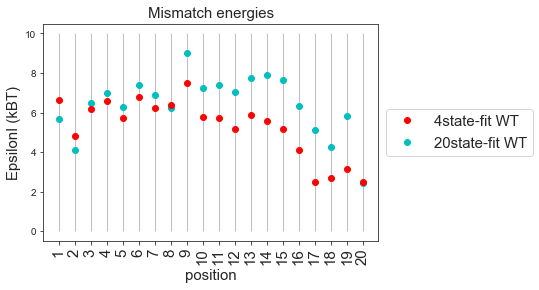

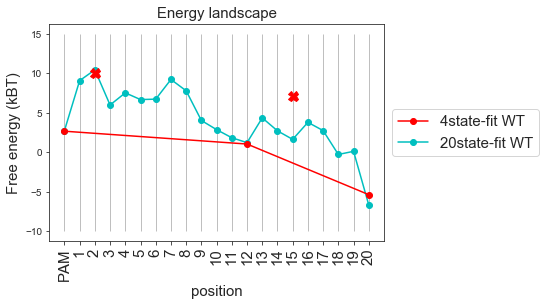

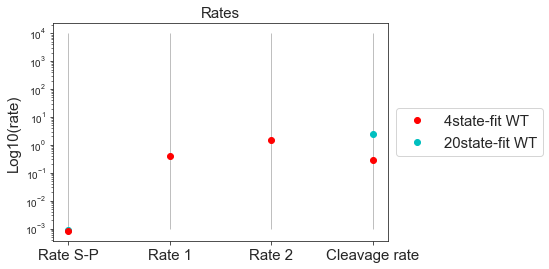

In [8]:
file = '../../fits_Stijn/6_8_2019/fit_6_8_2019_sim_5.txt'
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'
#model_id = 'engineered_clv_rates_constant_ei+engineered_on_rates_constant_ei'; parnum= '3'
#model_id = 'engineered_clv_rates_constant_ei_v2+engineered_on_rates_constant_ei_v2'; parnum= '4'
data = pd.read_table(file,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
final_par_np = np.array(final_par.values)
parameters = final_par_np


model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(final_par_np,model_id)
energies,rates = model.unpack_parameters(parameters_on,model_ID_on,20)
_,rates_clv = model.unpack_parameters(parameters_clv,model_ID_clv,20)
rates[-1] = rates_clv[-1]


model_ID = 'Clv_Saturated_general_energies_v2+general_energies_no_kPR'; parnum = '44'
filename = 'fit_18_7_2019_sim_17.txt'
path = '../../fits_Stijn/18_7_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
final_par_np = np.array(final_par.values)

model_ID_clv,model_ID_on,parameters_clv,parameters_on = model2.combined_model(final_par_np,model_ID)
energiesWT,ratesWT = model2.unpack_parameters(parameters_on,model_ID_on,20)
_,ratesWTclv = model2.unpack_parameters(parameters_clv,model_ID_clv,20)
ratesWT[-1] = ratesWTclv[-1]

plot4, = plt.plot(range(1,21),energiesWT[-20:],'co',label='20state-fit WT')
plot1, = plt.plot(range(1,21),energies[5:25],'ro',label='4state-fit WT')
plt.legend(handles=[plot1,plot4],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('EpsilonI (kBT)',fontsize=15)
plt.title('Mismatch energies',fontsize=15)
plt.vlines(range(1,21),0,10,color='grey',linewidth=0.5);
plt.xticks(range(1,21),range(1,21),fontsize=15,rotation='vertical');




barrier1 = -np.log(rates[1]/ratesWT[1])
barrier2 = -np.log(rates[2]/ratesWT[1])
landscape4 = -np.cumsum(np.append(-energies[0],energies[1:3]))
landscape20 = -np.cumsum(np.append(-energiesWT[0],energiesWT[1:21]))

plt.figure()
plot5, = plt.plot(range(0,21),landscape20,'c-o',label='20state-fit WT')
plot1, = plt.plot([0,12,20],landscape4,'r-o',label='4state-fit WT')
plt.plot([2,15],[barrier1+landscape4[0],barrier2+landscape4[1]],'rX',markersize=10)
plt.legend(handles=[plot1,plot5],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.xlabel('position',fontsize=15)
plt.ylabel('Free energy (kBT)',fontsize=15)
plt.title('Energy landscape',fontsize=15)
plt.vlines(range(0,21),-10,15,color='grey',linewidth=0.5);
plt.xticks(range(0,21),['PAM'] + range(1,21),fontsize=15,rotation='vertical');

plt.figure()
plot3, = plt.semilogy([1,4],[ratesWT[0],ratesWT[-1]],'co',label='20state-fit WT')
plot1, = plt.semilogy(range(1,len(rates)+1),rates,'ro',label='4state-fit WT')
plt.legend(handles=[plot1,plot3],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.ylabel('Log10(rate)',fontsize=15)
plt.title('Rates',fontsize=15)
plt.vlines(range(1,len(rates)+1),10**-3,10**4,color='grey',linewidth=0.5);
plt.xticks(range(1,len(rates)+1),['Rate S-P','Rate 1','Rate 2','Cleavage rate'],fontsize=15);


In [29]:
filename = 'Enh_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    #if len(xdata[i])==1:
    #    if xdata[i][0]==6 or xdata[i][0]==7:
    #        ydata[i][1] = []
    #        yerr[i][1] = []
    if len(xdata[i]) > 0 and (xdata[i][0] == 2 or xdata[i][0] == 6 or xdata[i][0] == 7):
        ydata[i][1] = []
        yerr[i][1] = []
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

kclv = []
kon = []
erron = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            kon.append((ydata[a][1][0]))
            erron.append((yerr[a][1][0]))
            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
kon.append((ydata[0][1][0]))
kon = np.array(kon)
erron.append(yerr[0][1][0])
erron = np.array(erron)


k_double = np.zeros([20,20])
on_double = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0][0])
        if len(ydata[a][1])>0:
            on_double[j-1,i-1] = (ydata[a][1][0])
        else:
            on_double[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
on_double_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))

Text(453.236,0.5,'mismatch 2')

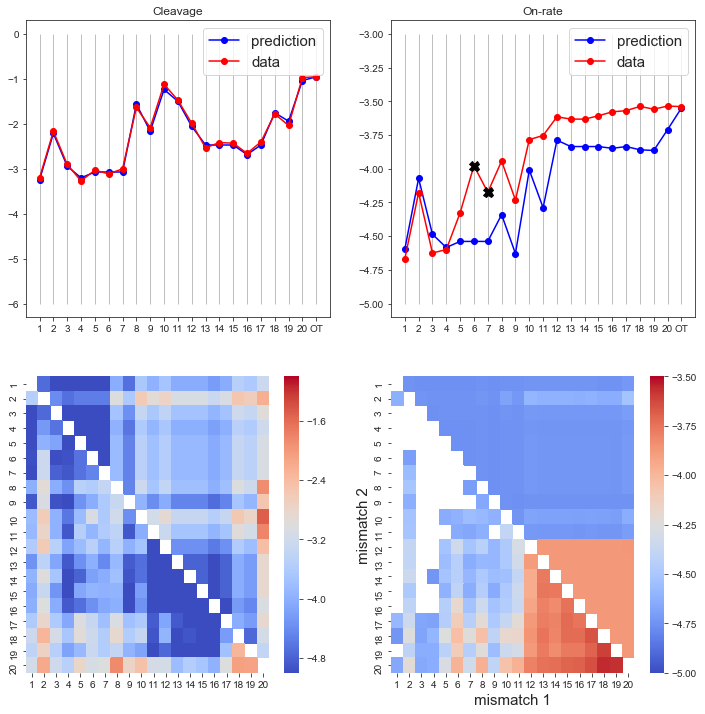

In [41]:
file = '../../fits_Stijn/7_6_2019/fit_7_6_2019_sim_8_5.txt'
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'
#model_id = 'engineered_clv_rates_constant_ei+engineered_on_rates_constant_ei'; parnum= '3'
data = pd.read_table(file,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
final_par_np = np.array(final_par.values)
parameters = final_par_np

final_par_np[3:23] = 5.37

final_par_np[3] += 0.4
final_par_np[4] += -2.
final_par_np[5] += -0.3
final_par_np[6] += 0.3
final_par_np[11] += 1.6
final_par_np[12] += -1.2
final_par_np[13] += -0.2
final_par_np[14] += -1.
final_par_np[18] += 0.5
final_par_np[20] += 1.2
final_par_np[21] += 1.7
final_par_np[22] += -2.


final_par_np[2] = 3.64055546
#print final_par_np[-2]
final_par_np[-2] = -0.06237973
final_par_np[-1] = -0.36174778



reload(clv)
k = np.zeros(21)
on = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],on[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],on[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))

f,ax = plt.subplots(2,2,sharey=False,figsize=[12,12])
    
ax[0][0].plot(range(1,22),k,marker='o',color='blue')
ax[0][0].set_xticks(range(1,22));
ax[0][0].set_xticklabels(range(1,21)+['OT'])
ax[0][0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0][0].plot(range(1,22),kclv,marker='o',color='red')
ax[0][0].legend(['prediction','data'],fontsize=15)
ax[0][0].set_title('Cleavage')

ax[0][1].plot(range(1,22),on,marker='o',color='blue')
#ax[0][1].errorbar(range(1,22),kon,erron*10,marker='o',color='red')
ax[0][1].set_xticks(range(1,22));
ax[0][1].set_xticklabels(range(1,21)+['OT'])
ax[0][1].vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
ax[0][1].plot(range(1,22),kon,marker='o',color='red')
ax[0][1].legend(['prediction','data'],fontsize=15)
ax[0][1].set_title('On-rate')
for i in range(21):
    if i+1==6 or i+1==7:
        ax[0][1].plot(i+1,kon[i],marker='X',color='k',markersize=10)

k_double = np.zeros([20,20])
on_double = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double[i-1][j-1],on_double[i-1][j-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
k_df = k_df + k_double_df
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
on_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))
on_df = on_df + on_double_df
for i in range(1,21):
    on_df[i].loc[i]=np.nan
    
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1][0],vmin=-5,vmax=-1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df, cmap='coolwarm', cbar=True,ax=ax[1][1],vmin=-5,vmax=-3.5)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)